# Granger causality test tutorial
###### by Daegun Kim

### <span style="color:#ffd33d">**Warning**</span>
> Granger causality test can only provide 'Granger Causality' not the causality   
Thus, it would be stretching a point to use Granger causality test as proof of general causality between two time series variables.

### **Granger Causality Test Structure**
|Model Category|Regression Formula|Coefficients|Walt Test|
|:---|---:|---:|---:|
|Restricted|$$y_t = c_1 + \sum_{i=1}^{p}\alpha_{1,i}\ y_{t-i} + \epsilon_{1, t},\\ where\ p\ is\ time\ lag$$|$$\beta_{1}=\beta_{2}=\beta_{3}=0$$|Null hypothesis|
|Unrestricted|$$y_t = c_2 + \sum_{i=1}^{p}\alpha_{2,i}\ y_{t-i} + \sum_{i=1}^{p}\beta_{i}\ x_{t-i} + \epsilon_{2, t},\\ where\ p\ is\ time\ lag$$|$$At\ least\ one\ of\\ \beta_{1},\ \beta_{2},\ \beta_{3}\ is\ not\ 0$$|Alternative hypothesis|
***

## Load packages

In [108]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import seaborn as sns

from statsmodels.tsa.stattools import grangercausalitytests, kpss, adfuller
from matplotlib import pyplot as plt

## Configurations

In [109]:
def fix_random_seed(seed=42):
    import random
    import numpy as np 
    import os

    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    try:
        tf.random.set_seed(seed)
    except:
        pass
    
fix_random_seed()

In [110]:
from matplotlib import font_manager, rc
try:
    font_path = "C:/Windows/Fonts/malgun.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)
except:
    pass

# Fix minus presentation
mpl.rcParams['axes.unicode_minus'] = False

# Matplotlib fontsize change
SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('font', size=SMALL_SIZE, weight='bold')
plt.rc('axes', titlesize=LARGE_SIZE, titleweight='bold')
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')
plt.rc('axes', titleweight='bold')
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=LARGE_SIZE)

## Example with causality

In [111]:
# Set time
t = np.arange(0, 30)

# Set factor
factor_1 = np.sin(t/np.pi)

time_lag = 4
factor_2 = np.arctan(2*t/np.pi) + np.cos(2*t/np.pi) + np.sin((t+time_lag)/np.pi)

# Assign noise to each factor
factor_1_noise = factor_1 + np.random.random(size=np.shape(factor_1))
factor_2_noise = factor_2 + np.random.random(size=np.shape(factor_1))

# Make DataFrame
df_w_cause_w_noise = pd.DataFrame(data={
    'y1':factor_1_noise, 'y2':factor_2_noise
})

e:\DaegunKim\envs\krx_project\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
e:\DaegunKim\envs\krx_project\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


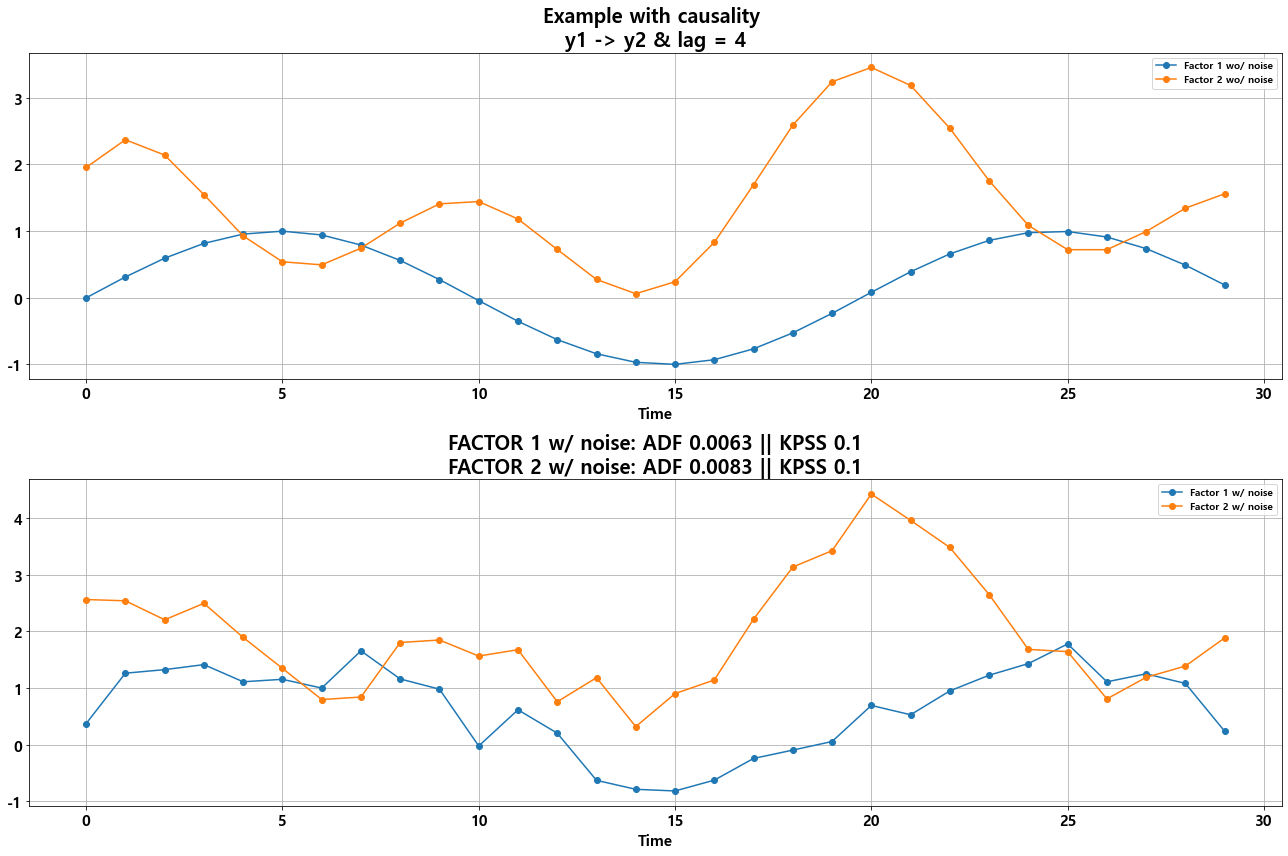

In [112]:
# plot - two time series factors with causality
fig_w_cause, ax_w_cause = plt.subplots(2, 1, figsize=(18, 12))

ax_w_cause[0].plot(t, factor_1, marker='o', label='Factor 1 wo/ noise')
ax_w_cause[0].plot(t, factor_2, marker='o',label='Factor 2 wo/ noise')
ax_w_cause[0].legend()
ax_w_cause[0].set_xlabel('Time')
ax_w_cause[0].grid(True)

ax_w_cause[1].plot(t, factor_1_noise, marker='o',label='Factor 1 w/ noise')
ax_w_cause[1].plot(t, factor_2_noise, marker='o',label='Factor 2 w/ noise')
ax_w_cause[1].legend()
ax_w_cause[1].set_xlabel('Time')
ax_w_cause[1].grid(True)
ax_w_cause[1].set_title(f"""FACTOR 1 w/ noise: ADF {adfuller(factor_1_noise)[1]:.2} || KPSS {kpss(factor_1_noise)[1]:.2}
FACTOR 2 w/ noise: ADF {adfuller(factor_2_noise)[1]:.2} || KPSS {kpss(factor_2_noise)[1]:.2}""")

ax_w_cause[0].set_title(f'Example with causality \ny1 -> y2 & lag = {time_lag}', fontsize=20)
fig_w_cause.tight_layout()

In [113]:
# Test the Granger causality y1->y2
max_lag = 8

gct_w_cause_w_noise_y1_y2 = grangercausalitytests(
    df_w_cause_w_noise[['y2','y1']],
    maxlag=max_lag,
    verbose=2,
)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2691  , p=0.0822  , df_denom=26, df_num=1
ssr based chi2 test:   chi2=3.6464  , p=0.0562  , df=1
likelihood ratio test: chi2=3.4347  , p=0.0638  , df=1
parameter F test:         F=3.2691  , p=0.0822  , df_denom=26, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1072  , p=0.3475  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=2.6959  , p=0.2598  , df=2
likelihood ratio test: chi2=2.5739  , p=0.2761  , df=2
parameter F test:         F=1.1072  , p=0.3475  , df_denom=23, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2657  , p=0.0428  , df_denom=20, df_num=3
ssr based chi2 test:   chi2=13.2260 , p=0.0042  , df=3
likelihood ratio test: chi2=10.7643 , p=0.0131  , df=3
parameter F test:         F=3.2657  , p=0.0428  , df_denom=20, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7284  , p=0.0235  , df_d

In [114]:
# Test the Granger causality y2 -> y1
gct_w_cause_w_noise_y2_y1 = grangercausalitytests(
    df_w_cause_w_noise[['y1','y2']],
    maxlag=max_lag,
    verbose=2,
)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0203  , p=0.0941  , df_denom=26, df_num=1
ssr based chi2 test:   chi2=3.3688  , p=0.0664  , df=1
likelihood ratio test: chi2=3.1871  , p=0.0742  , df=1
parameter F test:         F=3.0203  , p=0.0941  , df_denom=26, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7977  , p=0.0817  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=6.8119  , p=0.0332  , df=2
likelihood ratio test: chi2=6.0971  , p=0.0474  , df=2
parameter F test:         F=2.7977  , p=0.0817  , df_denom=23, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9513  , p=0.1539  , df_denom=20, df_num=3
ssr based chi2 test:   chi2=7.9028  , p=0.0481  , df=3
likelihood ratio test: chi2=6.9317  , p=0.0741  , df=3
parameter F test:         F=1.9513  , p=0.1539  , df_denom=20, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1384  , p=0.3719  , df_d

In [115]:
# Set test resut DataFrame
df_pval_w_cause_w_noise = pd.DataFrame(
    columns=['y1->y2', 'y2->y1'],
    index=np.arange(1, max_lag+1),
    dtype='int',
)

# Take the Ganger causality test result of y1 affected y2
for k1, v1 in gct_w_cause_w_noise_y1_y2.items():
    p_vals_y1_y2 = []

    for k2, v2 in v1[0].items():
        p_vals_y1_y2.append(v2[1])

    if all(np.array(p_vals_y1_y2)<0.05):
        df_pval_w_cause_w_noise.at[k1, 'y1->y2'] = 1
    else:
        df_pval_w_cause_w_noise.at[k1, 'y1->y2'] = -1

# Take the Ganger causality test result of y2 affected y1
for k1, v1 in gct_w_cause_w_noise_y2_y1.items():
    p_vals_y2_y1 = []

    for k2, v2 in v1[0].items():
        p_vals_y2_y1.append(v2[1])

    if all(np.array(p_vals_y2_y1)<0.05):
        df_pval_w_cause_w_noise.at[k1, 'y2->y1'] = 1
    else:
        df_pval_w_cause_w_noise.at[k1, 'y2->y1'] = -1

df_pval_w_cause_w_noise

,y1->y2,y2->y1
1,-1.0,-1.0
2,-1.0,-1.0
3,1.0,-1.0
4,1.0,-1.0
5,-1.0,-1.0
6,-1.0,-1.0
7,-1.0,-1.0
8,-1.0,-1.0


Text(81.0, 0.5, 'Statistical-significance')

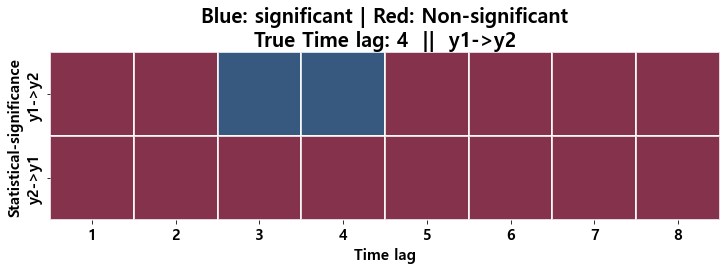

In [116]:
# plot - p-value result by time lag
fig_w_cause_heat, ax_w_cause_heat = plt.subplots(1, 1, figsize=(12, 6))

sns.heatmap(
    df_pval_w_cause_w_noise.T, 
    square=True,
    cmap='RdBu',
    alpha=0.8,
    cbar=False,
    ax=ax_w_cause_heat,
    linecolor='white',
    linewidths=2,
    )

ax_w_cause_heat.set_title(f'Blue: significant | Red: Non-significant\nTrue Time lag: {time_lag}  ||  y1->y2', fontsize=20)
ax_w_cause_heat.set_xlabel('Time lag', fontsize=15)
ax_w_cause_heat.set_ylabel('Statistical-significance', fontsize=15)

## Example without causality

In [117]:
# Set factor
factor_3 = 0.5*np.ones(np.shape(t))
factor_4 = 0.5*np.sin(t/np.pi)

# Assign noise to each factor
factor_3_noise = np.random.random(size=np.shape(factor_1))
factor_4_noise = np.random.random(size=np.shape(factor_1))

# Make DataFrame
df_wo_cause_w_noise = pd.DataFrame(data={
    'y3':factor_3_noise, 'y4':factor_4_noise
})

e:\DaegunKim\envs\krx_project\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
e:\DaegunKim\envs\krx_project\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


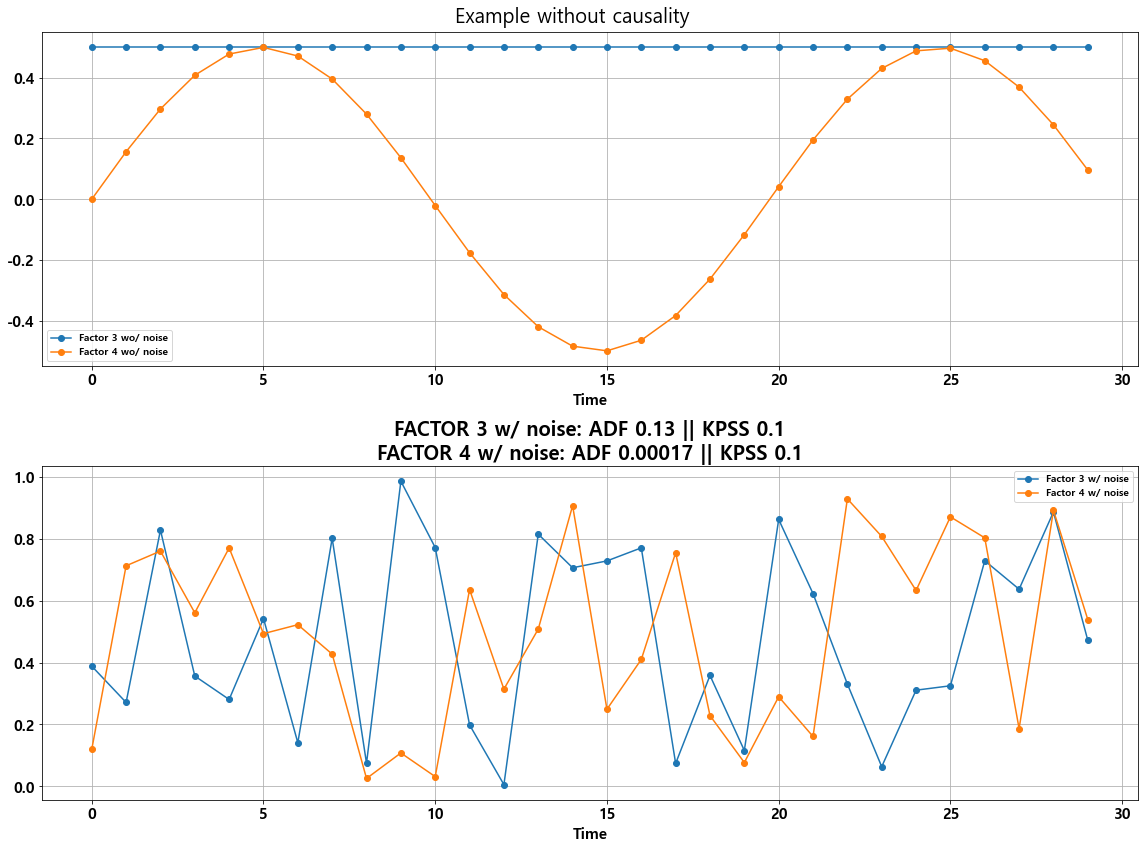

In [118]:
# plot - two time series factors with causality
fig_wo_cause, ax_wo_cause = plt.subplots(2, 1, figsize=(16, 12))

ax_wo_cause[0].plot(t, factor_3, marker='o', label='Factor 3 wo/ noise')
ax_wo_cause[0].plot(t, factor_4, marker='o', label='Factor 4 wo/ noise')
ax_wo_cause[0].legend()
ax_wo_cause[0].set_xlabel('Time')
ax_wo_cause[0].grid(True)

ax_wo_cause[1].plot(t, factor_3_noise, marker='o',label='Factor 3 w/ noise')
ax_wo_cause[1].plot(t, factor_4_noise, marker='o',label='Factor 4 w/ noise')
ax_wo_cause[1].legend()
ax_wo_cause[1].set_xlabel('Time')
ax_wo_cause[1].grid(True)
ax_wo_cause[1].set_title(f"""FACTOR 3 w/ noise: ADF {adfuller(factor_3_noise)[1]:.2} || KPSS {kpss(factor_3_noise)[1]:.2}
FACTOR 4 w/ noise: ADF {adfuller(factor_4_noise)[1]:.2} || KPSS {kpss(factor_4_noise)[1]:.2}""")

fig_wo_cause.suptitle(f'Example without causality', fontsize=20)
fig_wo_cause.tight_layout()

In [119]:
# Test the Granger causality y3->y4
max_lag = 8

gct_wo_cause_w_noise_y3_y4 = grangercausalitytests(
    df_wo_cause_w_noise[['y3','y4']],
    maxlag=max_lag,
    verbose=2,
)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8830  , p=0.3560  , df_denom=26, df_num=1
ssr based chi2 test:   chi2=0.9849  , p=0.3210  , df=1
likelihood ratio test: chi2=0.9685  , p=0.3251  , df=1
parameter F test:         F=0.8830  , p=0.3560  , df_denom=26, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6875  , p=0.5129  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=1.6739  , p=0.4330  , df=2
likelihood ratio test: chi2=1.6257  , p=0.4436  , df=2
parameter F test:         F=0.6875  , p=0.5129  , df_denom=23, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7472  , p=0.5366  , df_denom=20, df_num=3
ssr based chi2 test:   chi2=3.0262  , p=0.3876  , df=3
likelihood ratio test: chi2=2.8683  , p=0.4124  , df=3
parameter F test:         F=0.7472  , p=0.5366  , df_denom=20, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9584  , p=0.4553  , df_d

In [120]:
# Test the Granger causality y4 -> y3
gct_wo_cause_w_noise_y4_y3 = grangercausalitytests(
    df_wo_cause_w_noise[['y3','y4']],
    maxlag=max_lag,
    verbose=2,
)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8830  , p=0.3560  , df_denom=26, df_num=1
ssr based chi2 test:   chi2=0.9849  , p=0.3210  , df=1
likelihood ratio test: chi2=0.9685  , p=0.3251  , df=1
parameter F test:         F=0.8830  , p=0.3560  , df_denom=26, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6875  , p=0.5129  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=1.6739  , p=0.4330  , df=2
likelihood ratio test: chi2=1.6257  , p=0.4436  , df=2
parameter F test:         F=0.6875  , p=0.5129  , df_denom=23, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7472  , p=0.5366  , df_denom=20, df_num=3
ssr based chi2 test:   chi2=3.0262  , p=0.3876  , df=3
likelihood ratio test: chi2=2.8683  , p=0.4124  , df=3
parameter F test:         F=0.7472  , p=0.5366  , df_denom=20, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9584  , p=0.4553  , df_d

In [121]:
# Set test resut DataFrame
df_pval_wo_cause_w_noise = pd.DataFrame(
    columns=['y3->y4', 'y4->y3'],
    index=np.arange(1, max_lag+1),
    dtype='int',
)

# Take the Ganger causality test result of y1 affected y2
for k1, v1 in gct_wo_cause_w_noise_y3_y4.items():
    p_vals_y3_y4 = []

    for k2, v2 in v1[0].items():
        p_vals_y3_y4.append(v2[1])

    if all(np.array(p_vals_y3_y4)<0.05):
        df_pval_wo_cause_w_noise.at[k1, 'y3->y4'] = 1
    else:
        df_pval_wo_cause_w_noise.at[k1, 'y3->y4'] = -1

# Take the Ganger causality test result of y4 affected y3
for k1, v1 in gct_wo_cause_w_noise_y4_y3.items():
    p_vals_y4_y3 = []

    for k2, v2 in v1[0].items():
        p_vals_y4_y3.append(v2[1])

    if all(np.array(p_vals_y4_y3)<0.05):
        df_pval_wo_cause_w_noise.at[k1, 'y4->y3'] = 1
    else:
        df_pval_wo_cause_w_noise.at[k1, 'y4->y3'] = -1

df_pval_wo_cause_w_noise

,y3->y4,y4->y3
1,-1.0,-1.0
2,-1.0,-1.0
3,-1.0,-1.0
4,-1.0,-1.0
5,-1.0,-1.0
6,-1.0,-1.0
7,-1.0,-1.0
8,-1.0,-1.0


Text(81.0, 0.5, 'Statistical-significance')

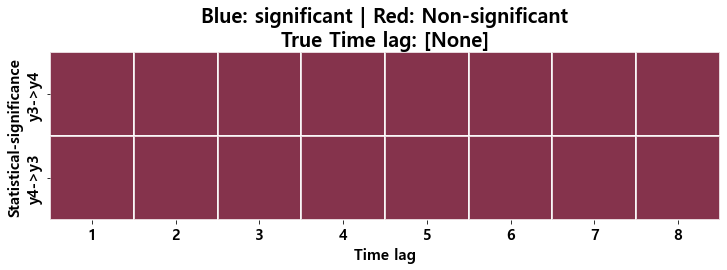

In [122]:
# plot - p-value result by time lag
fig_wo_cause_heat, ax_wo_cause_heat = plt.subplots(1, 1, figsize=(12, 6))

sns.heatmap(
    df_pval_wo_cause_w_noise.T, 
    square=True,
    cmap='RdBu',
    alpha=0.8,
    cbar=False,
    ax=ax_wo_cause_heat,
    linecolor='white',
    linewidths=2,
    )

ax_wo_cause_heat.set_title(f'Blue: significant | Red: Non-significant\nTrue Time lag: [None]', fontsize=20)
ax_wo_cause_heat.set_xlabel('Time lag', fontsize=15)
ax_wo_cause_heat.set_ylabel('Statistical-significance', fontsize=15)

***
### Refence
* https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html
* https://en.wikipedia.org/wiki/Granger_causality
* https://intothedata.com/02.scholar_category/timeseries_analysis/granger_causality/
* https://www.aptech.com/blog/introduction-to-granger-causality/